# Adiabatic Linear Regression with Synthetic Data

This example shows how to train an adiabatic linear regression with a single features on a synthetically generated dataset.

In [1]:
import numpy as np
import sklearn.datasets as dt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import sys

sys.path.append("../")

In [2]:
from qml_adiabatic import QALinearRegression

## Data Preparation

We will use the synthetically generated dataset via Python Sklearn package.

In [3]:
seed = 20
rand_state = 11
rand= np.random.RandomState(seed)   
x, y = dt.make_regression(n_samples=100, n_features=1, noise=5, n_informative=1, random_state=rand_state)

# split on train-test
x_points, x_test, y_labels, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## Training and Model Evaluation

We initialize and train the model on the generated dataset. There are several **optional** parameters to consider:
* precision_vector (numpy.array) 
* normalize (bool)
* scaler (RobustScaler, MaxAbsScaler, StandardScaler)

The *precision_vector* parameter controls the distribution of the regression lines. More details are in the white paper ["Adiabatic quantum linear regression" by Date, P., Potok, T.](https://doi.org/10.1038/s41598-021-01445-6).

The *normalize* controls the normalization/re-scaling of the data set. 

The *scaler* provides the optinion to control the normalization of data set.   

In [4]:
# initialize and train Adiabatic Linear Regression
precision_vector = np.array([0, 0.125, 0.25, 0.5, 0.75])    

qa_lin_model = QALinearRegression(precision_vector=precision_vector, normalize=True, scaler="MaxAbsScaler")
qa_lin_model.train(x_points, y_labels)
y_predicted = qa_lin_model.predict(x_points)

For comparison, let's train the Sklearn linear regression on the same data points.

In [5]:
model = LinearRegression()
trained_model = model.fit(x_points, y_labels)
y_predict_classical = trained_model.predict(x_points)

In [6]:
print("Adiabatic Linear Regression R^2 score on training data: {}".format(qa_lin_model.r_score(y_labels, y_predicted)))
print("Sklearn Linear Regression R^2 score on training data: {}".format(r2_score(y_labels, y_predict_classical)))

Adiabatic Linear Regression R^2 score on training data: 0.9756736682844375
Sklearn Linear Regression R^2 score on training data: 0.9855625769178462


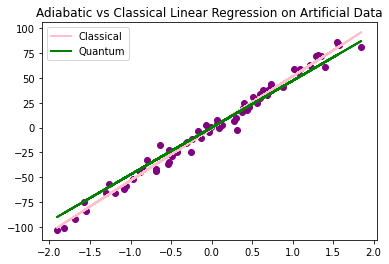

In [7]:
# plots
plt.scatter(x_points, y_labels, color="purple")
plt.plot(x_points, y_predict_classical, color='pink', linewidth=2, label='Classical')
plt.plot(x_points, y_predicted, color='green', linewidth=2, label='Quantum')
plt.legend(loc='upper left')
plt.title("Adiabatic vs Classical Linear Regression on Artificial Data")
plt.show()

Let's evaluate both models on the test points.

In [8]:
# sklearn
y_predict_classical = trained_model.predict(x_test)

# adiabatic
y_predicted_quantum = qa_lin_model.predict(x_test)

print("Classical Prediction {}".format(y_predict_classical))
print("Quantum prediction {}".format(y_predicted_quantum))

Classical Prediction [ -10.12510532   35.6735365    90.91996152  -44.26957727  -25.75308887
  -20.73749564   57.654055     21.28295154   42.73698375  -59.47382189
   10.60454849 -139.88027881   37.25587965  -56.44171628   -8.22746615
  -15.7855759    56.23031561  -38.19510736  -56.64975293   30.3327729
  112.26705223  -46.04746828   27.19458314   44.2234885     5.38709868
  -10.52781552  -11.50285609  -65.39069279  -30.87677622    3.06344664]
Quantum prediction [[ -6.04797792]
 [ 23.621205  ]
 [ 59.4108316 ]
 [-28.16738024]
 [-16.17206642]
 [-12.92287502]
 [ 37.86057975]
 [ 14.29872554]
 [ 28.19703302]
 [-38.01696304]
 [  7.38106421]
 [-90.1057103 ]
 [ 24.64627532]
 [-36.05271056]
 [ -4.81865318]
 [ -9.71493245]
 [ 36.9382558 ]
 [-24.23222951]
 [-36.18748043]
 [ 20.16136239]
 [ 73.23986045]
 [-29.31912998]
 [ 18.12838669]
 [ 29.1600175 ]
 [  4.0011065 ]
 [ -6.30886083]
 [ -6.94050962]
 [-41.85001831]
 [-19.49128312]
 [  2.49580296]]


In [9]:
# print metrics
print('Adiabatic Regression MAE on test data = ', qa_lin_model.mae(y_test, y_predicted_quantum))
print('Adiabatic Regression MSE on test data = ', qa_lin_model.mse(y_test, y_predicted_quantum))
print('Adiabatic Regression Root MSE on test data = ', qa_lin_model.root_mse(y_test, y_predicted_quantum))
print('Adiabatic Regression R^2 on test data= ', qa_lin_model.r_score(y_test, y_predicted_quantum))
print("Sklearn R^2 on test data = ", qa_lin_model.r_score(y_test, y_predict_classical))

Adiabatic Regression MAE on test data =  62.2324098629971
Adiabatic Regression MSE on test data =  116186.18512068177
Adiabatic Regression Root MSE on test data =  340.860946898705
Adiabatic Regression R^2 on test data=  0.8556382431264372
Sklearn R^2 on test data =  0.9913720355920954


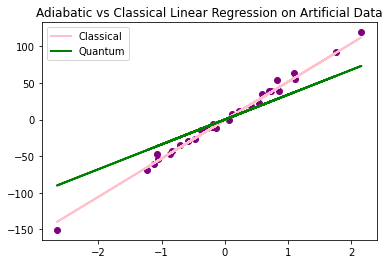

In [10]:
# plots
plt.scatter(x_test, y_test, color="purple")
plt.plot(x_test, y_predict_classical, color='pink', linewidth=2, label='Classical')
plt.plot(x_test, y_predicted_quantum, color='green', linewidth=2, label='Quantum')
plt.legend(loc='upper left')
plt.title("Adiabatic vs Classical Linear Regression on Artificial Data")
plt.show()